In [1]:
import numpy as np
import pandas as pd
import scipy

from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic
from statsmodels.stats.proportion import proportion_confint

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Загружаем данные

In [2]:
df = pd.read_csv('data.csv', sep=',')
df.shape

(10000, 7)

Посмотрим основные характеристики данных, есть два пропущенных значения в запрашиваемой сумме

In [33]:
df.describe()

,id,required_amt,installment_flg,monthly_income_amt,age,has_high_education_flg,approved_flg
count,10000.00000,9998.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,5000.50000,37806.147129,0.626000,4.654274e+04,32.532200,0.352100,0.261100
std,2886.89568,29479.567128,0.483888,3.622018e+04,11.355345,0.477649,0.439256
min,1.00000,2180.000000,0.000000,2.200000e+01,18.000000,0.000000,0.000000
25%,2500.75000,16990.000000,0.000000,2.800000e+04,24.000000,0.000000,0.000000
50%,5000.50000,27734.500000,1.000000,4.000000e+04,30.000000,0.000000,0.000000
75%,7500.25000,52534.750000,1.000000,5.500000e+04,38.000000,1.000000,1.000000
max,10000.00000,279788.000000,1.000000,1.500000e+06,74.000000,1.000000,1.000000


In [34]:
df[df['required_amt'].isnull()]

,id,required_amt,installment_flg,monthly_income_amt,age,has_high_education_flg,approved_flg
5531,5532,NaN,0,35000,35,1,1
6053,6054,NaN,0,25000,65,0,1


# Задание 1

Выделим отдельно данные о запрошенной сумме и ежемесячном доходе и построим их распределения

In [4]:
df_part = df[['required_amt', 'monthly_income_amt']]

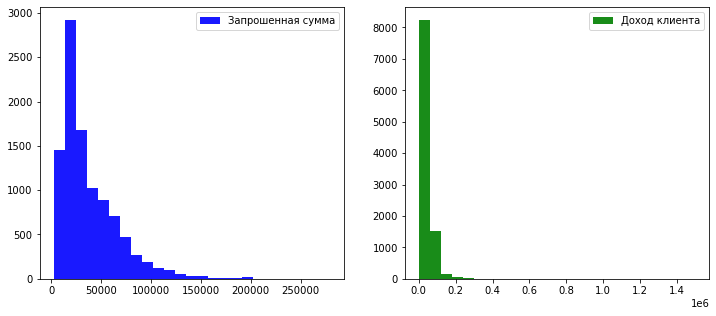

In [28]:
pylab.figure(figsize(12, 5))
pylab.subplot(1,2,1)
pylab.hist(df_part['required_amt'],
           bins = 25,
           color = 'b',
           alpha = 0.9,
           label = 'Запрошенная сумма')
pylab.legend()

pylab.subplot(1,2,2)
pylab.hist(df_part['monthly_income_amt'],
           bins = 25,
           color = 'g',
           alpha = 0.9,
           label = 'Доход клиента')
pylab.legend()

pylab.show()

Поскольку исходные данные, как мы предполагаем, распределены логнормально, то их логарифм распределен нормально, возьмем
логарифм

In [6]:
df_part_ln = df_part.apply(np.log)

И визуализируем

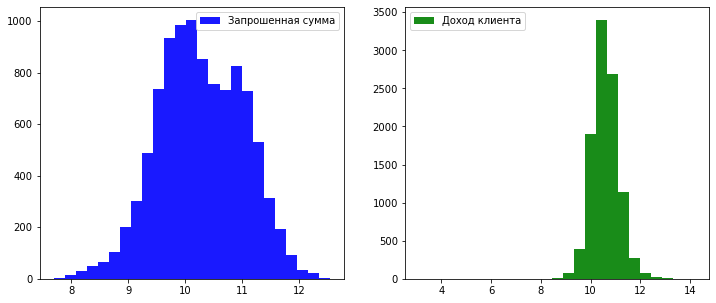

In [29]:
pylab.figure(figsize(12, 5))
pylab.subplot(1,2,1)
pylab.hist(df_part_ln['required_amt'],
           bins = 25,
           color = 'b',
           alpha = 0.9,
           label = 'Запрошенная сумма')
pylab.legend()

pylab.subplot(1,2,2)
pylab.hist(df_part_ln['monthly_income_amt'],
           bins = 25,
           color = 'g',
           alpha = 0.9,
           label = 'Доход клиента')
pylab.legend()

pylab.show()

In [31]:
df_part_ln.describe()

,required_amt,monthly_income_amt
count,9998.000000,10000.000000
mean,10.270152,10.583687
std,0.746767,0.566499
min,7.687080,3.091042
25%,9.740380,10.239960
50%,10.230432,10.596635
75%,10.869230,10.915088
max,12.541787,14.220976


In [32]:
df_part.describe()

,required_amt,monthly_income_amt
count,9998.000000,1.000000e+04
mean,37806.147129,4.654274e+04
std,29479.567128,3.622018e+04
min,2180.000000,2.200000e+01
25%,16990.000000,2.800000e+04
50%,27734.500000,4.000000e+04
75%,52534.750000,5.500000e+04
max,279788.000000,1.500000e+06


Построим предсказательные интервалы для логарифма запрошенной суммы и логарифма дохода, после чего края интервалов потенцируем, тогда получим предсказательные интервалы для самой суммы и дохода

In [50]:
diff_pred_int = _zconfint_generic(df_part_ln['required_amt'].mean(),\
                                  df_part_ln['required_amt'].std(ddof=1), 0.05, 'two-sided')

print(f'95% предсказательный интервал запрошенной суммы:[{np.exp(diff_pred_int[0]):,.2f} - {np.exp(diff_pred_int[1]):,.2f}]')

95% предсказательный интервал запрошенной суммы:[6,677.61 - 124,715.15]


In [51]:
diff_pred_int = _zconfint_generic(df_part_ln['monthly_income_amt'].mean(),\
                                  df_part_ln['monthly_income_amt'].std(ddof=1), 0.05, 'two-sided')

print(f'95% предсказательный интервал ежемесячного дохода:[{np.exp(diff_pred_int[0]):,.2f} - {np.exp(diff_pred_int[1]):,.2f}]')

95% предсказательный интервал ежемесячного дохода:[13,008.65 - 119,851.03]


# Задание 2

Сначала сравним доли клиентов с высшим образованием среди одобренных/неодобренных

In [100]:
approved_client_education_conf_int = proportion_confint(df[df.has_high_education_flg == 1].approved_flg.sum(),
                                                    len(df[df.has_high_education_flg == 1].approved_flg),
                                                    alpha = 0.01,
                                                    method = 'wilson')

print(f'99% доверительный интервал доли с высшим образованием: [{approved_client_education_conf_int[0]:.4f} - {approved_client_education_conf_int[1]:.4f}]')

99% доверительный интервал доли с высшим образованием: [0.3074 - 0.3481]


In [171]:
disapproved_client_education_conf_int = proportion_confint(df[df.has_high_education_flg == 0].approved_flg.sum(),
                                                    len(df[df.has_high_education_flg == 0].approved_flg),
                                                    alpha = 0.01,
                                                    method = 'wilson')

print(f'99% доверительный интервал доли клиентов без высшего образования: [{disapproved_client_education_conf_int[0]:.4f} - {disapproved_client_education_conf_int[1]:.4f}]')

99% доверительный интервал доли клиентов без высшего образования: [0.2120 - 0.2387]


In [65]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.01):
    '''Считает доверительный интервал для разности долей в независимых выборках'''
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    sigma = np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    left_boundary = (p1 - p2) - z * sigma
    right_boundary = (p1 - p2) + z * sigma
    return (left_boundary, right_boundary)

In [102]:
proportions_confint_diff_ind(df[df.has_high_education_flg == 1].approved_flg,
                             df[df.has_high_education_flg == 0].approved_flg)

(0.07806537137828923, 0.1267927508516632)

Ноль не в доверительном интервале, значит между долями людей с высшим образованием среди одобренных банком есть статистически значимое отличие

Теперь сравним доли клиентов с рассрочкой и кредитом также среди одобренных/неодобренных

In [103]:
approved_client_education_conf_int = proportion_confint(df[df.installment_flg == 1].approved_flg.sum(),
                                                    len(df[df.installment_flg == 1].approved_flg),
                                                    alpha = 0.01,
                                                    method = 'wilson')

print(f'99% доверительный интервал доли одобренных клиентов с рассрочкой: [{approved_client_education_conf_int[0]:.4f} - {approved_client_education_conf_int[1]:.4f}]')

99% доверительный интервал доли одобренных клиентов с рассрочкой: [0.2465 - 0.2751]


In [104]:
disapproved_client_education_conf_int = proportion_confint(df[df.installment_flg == 0].approved_flg.sum(),
                                                    len(df[df.installment_flg == 0].approved_flg),
                                                    alpha = 0.01,
                                                    method = 'wilson')

print(f'99% доверительный интервал доли неодобренных клиентов с кредитом: [{disapproved_client_education_conf_int[0]:.4f} - {disapproved_client_education_conf_int[1]:.4f}]')

99% доверительный интервал доли неодобренных клиентов с кредитом: [0.2439 - 0.2810]


In [105]:
proportions_confint_diff_ind(df[df.installment_flg == 1].approved_flg,
                             df[df.installment_flg == 0].approved_flg)

(-0.02488224598127247, 0.021904336839108467)

Как видно, ноль находится в доверительном интервале, нельзя сказать, есть ли различие между запрашиваемым продуктом и его одобрением банком

Из вещественных признаков сперва рассмотрим возраст и разделим всех людей на 4 группы: 25% квантиль, от 25% квантиля до медианы, от медианы до 75% квантиля, а также те, кто старше 75% квантиля

In [98]:
first_group = df[df['age'] < df['age'].quantile(0.25)]
second_group = df[(df['age'] < df['age'].quantile(0.5)) & (df['age'] >= df['age'].quantile(0.25))]
third_group = df[(df['age'] < df['age'].quantile(0.75)) & (df['age'] >= df['age'].quantile(0.5))]
fourth_group = df[df['age'] >= df['age'].quantile(0.75)]

Размеры групп примерно одинаковые

In [99]:
print(first_group.shape, second_group.shape, third_group.shape, fourth_group.shape)

(2435, 7) (2415, 7) (2518, 7) (2632, 7)


Определим доверительные интервалы для каждой возрастной группы

In [137]:
first_group_conf_int = proportion_confint(first_group.approved_flg.sum(),
                                                    len(first_group.approved_flg),
                                                    alpha = 0.01,
                                                    method = 'wilson')
second_group_conf_int = proportion_confint(second_group.approved_flg.sum(),
                                                    len(second_group.approved_flg),
                                                    alpha = 0.01,
                                                    method = 'wilson')
third_group_conf_int = proportion_confint(third_group.approved_flg.sum(),
                                                    len(third_group.approved_flg),
                                                    alpha = 0.01,
                                                    method = 'wilson')
fourth_group_conf_int = proportion_confint(fourth_group.approved_flg.sum(),
                                                    len(fourth_group.approved_flg),
                                                    alpha = 0.01,
                                                    method = 'wilson')

print(f'99% доверительный интервал в первой возрастной группе: [{first_group_conf_int[0]:.3f} - {first_group_conf_int[1]:.3f}]')
print(f'99% доверительный интервал во второй возрастной группе: [{second_group_conf_int[0]:.3f} - {second_group_conf_int[1]:.3f}]')
print(f'99% доверительный интервал в третьей возрастной группе: [{third_group_conf_int[0]:.3f} - {third_group_conf_int[1]:.3f}]')
print(f'99% доверительный интервал в четвёртой возрастной группе: [{fourth_group_conf_int[0]:.3f} - {fourth_group_conf_int[1]:.3f}]')

99% доверительный интервал в первой возрастной группе: [0.091 - 0.123]
99% доверительный интервал во второй возрастной группе: [0.200 - 0.243]
99% доверительный интервал в третьей возрастной группе: [0.289 - 0.336]
99% доверительный интервал в четвёртой возрастной группе: [0.369 - 0.418]


Доверительные интервалы всех групп не пересекаются, значит статистически значимым является факт того, что доля одобрений от банка растёт от младшей возрастной группы к старшей

Кстати, стоит уточнить возраст групп:
- меньше 24 лет
- от 24 до 30 лет
- от 30 до 38 лет
- 38 и старше

По такому же принципу разделим данные о доходах и запрашиваемых суммах

In [120]:
first_group_income = df[df['monthly_income_amt'] < df['monthly_income_amt'].quantile(0.25)]
second_group_income = df[(df['monthly_income_amt'] < df['monthly_income_amt'].quantile(0.5)) & (df['monthly_income_amt'] >= df['monthly_income_amt'].quantile(0.25))]
third_group_income = df[(df['monthly_income_amt'] < df['monthly_income_amt'].quantile(0.75)) & (df['monthly_income_amt'] >= df['monthly_income_amt'].quantile(0.5))]
fourth_group_income = df[df['monthly_income_amt'] >= df['monthly_income_amt'].quantile(0.75)]

In [138]:
print(first_group_income.shape, second_group_income.shape, third_group_income.shape, fourth_group_income.shape)

(2388, 7) (2538, 7) (2535, 7) (2539, 7)


In [128]:
first_group_required = df[df['required_amt'] < df['required_amt'].quantile(0.25)]
second_group_required = df[(df['required_amt'] < df['required_amt'].quantile(0.5)) & (df['required_amt'] >= df['required_amt'].quantile(0.25))]
third_group_required = df[(df['required_amt'] < df['required_amt'].quantile(0.75)) & (df['required_amt'] >= df['required_amt'].quantile(0.5))]
fourth_group_required = df[df['required_amt'] >= df['required_amt'].quantile(0.75)]

In [140]:
print(first_group_required.shape, second_group_required.shape, third_group_required.shape, fourth_group_required.shape)

(2485, 7) (2514, 7) (2499, 7) (2500, 7)


Группы также примерно равного размера

In [139]:
first_group_conf_int = proportion_confint(first_group_income.approved_flg.sum(),
                                                    len(first_group_income.approved_flg),
                                                    alpha = 0.01,
                                                    method = 'wilson')
second_group_conf_int = proportion_confint(second_group_income.approved_flg.sum(),
                                                    len(second_group_income.approved_flg),
                                                    alpha = 0.01,
                                                    method = 'wilson')
third_group_conf_int = proportion_confint(third_group_income.approved_flg.sum(),
                                                    len(third_group_income.approved_flg),
                                                    alpha = 0.01,
                                                    method = 'wilson')
fourth_group_conf_int = proportion_confint(fourth_group_income.approved_flg.sum(),
                                                    len(fourth_group_income.approved_flg),
                                                    alpha = 0.01,
                                                    method = 'wilson')

print(f'99% доверительный интервал в первой группе по доходам: [{first_group_conf_int[0]:.3f} - {first_group_conf_int[1]:.3f}]')
print(f'99% доверительный интервал во второй группе по доходам: [{second_group_conf_int[0]:.3f} - {second_group_conf_int[1]:.3f}]')
print(f'99% доверительный интервал в третьей группе по доходам: [{third_group_conf_int[0]:.3f} - {third_group_conf_int[1]:.3f}]')
print(f'99% доверительный интервал в четвёртой группе по доходам: [{fourth_group_conf_int[0]:.3f} - {fourth_group_conf_int[1]:.3f}]')

99% доверительный интервал в первой группе по доходам: [0.251 - 0.298]
99% доверительный интервал во второй группе по доходам: [0.231 - 0.275]
99% доверительный интервал в третьей группе по доходам: [0.238 - 0.283]
99% доверительный интервал в четвёртой группе по доходам: [0.237 - 0.282]


В группах по доходам доля одобрений не имеет статистически значимых отличий

In [144]:
first_group_conf_int = proportion_confint(first_group_required.approved_flg.sum(),
                                                    len(first_group_required.approved_flg),
                                                    alpha = 0.01,
                                                    method = 'wilson')
second_group_conf_int = proportion_confint(second_group_required.approved_flg.sum(),
                                                    len(second_group_required.approved_flg),
                                                    alpha = 0.01,
                                                    method = 'wilson')
third_group_conf_int = proportion_confint(third_group_required.approved_flg.sum(),
                                                    len(third_group_required.approved_flg),
                                                    alpha = 0.01,
                                                    method = 'wilson')
fourth_group_conf_int = proportion_confint(fourth_group_required.approved_flg.sum(),
                                                    len(fourth_group_required.approved_flg),
                                                    alpha = 0.01,
                                                    method = 'wilson')

print(f'99% доверительный интервал в первой группе по необходимой сумме: [{first_group_conf_int[0]:.3f} - {first_group_conf_int[1]:.3f}]')
print(f'99% доверительный интервал во второй группе по необходимой сумме: [{second_group_conf_int[0]:.3f} - {second_group_conf_int[1]:.3f}]')
print(f'99% доверительный интервал в третьей группе по необходимой сумме: [{third_group_conf_int[0]:.3f} - {third_group_conf_int[1]:.3f}]')
print(f'99% доверительный интервал в четвёртой группе по необходимой сумме: [{fourth_group_conf_int[0]:.3f} - {fourth_group_conf_int[1]:.3f}]')

99% доверительный интервал в первой группе по необходимой сумме: [0.322 - 0.371]
99% доверительный интервал во второй группе по необходимой сумме: [0.265 - 0.311]
99% доверительный интервал в третьей группе по необходимой сумме: [0.233 - 0.278]
99% доверительный интервал в четвёртой группе по необходимой сумме: [0.139 - 0.176]


Все интервалы не пересекаются между собой, значит, с увеличением запрашиваемой суммы доля одобрений снижается значимо, кроме второй и третьей группы, где пересечение интервалов есть

# Визуализация доверительных интервалов

In [151]:
import pandas as pd

In [165]:
data_dict = {}
data_dict['category'] = ['<24','24-30','30-38', '>38']
data_dict['lower'] = [0.091, 0.2, 0.289, 0.369]
data_dict['upper'] = [0.123,0.243,0.336, 0.418]

dataset = pd.DataFrame(data_dict)

Text(0, 0.5, 'Возрастные категории, лет')

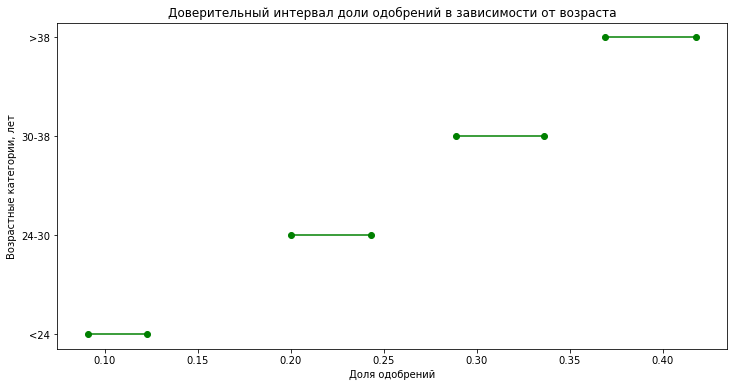

In [166]:
plt.figure(figsize(12,6))
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color='green')
plt.yticks(range(len(dataset)),list(dataset['category']))
plt.title('Доверительный интервал доли одобрений в зависимости от возраста')
plt.xlabel('Доля одобрений')
plt.ylabel('Возрастные категории, лет')

In [167]:
data_dict = {}
data_dict['category'] = ['<28','28-40','40-55', '>55']
data_dict['lower'] = [0.251, 0.231, 0.238, 0.237]
data_dict['upper'] = [0.298,0.275,0.283, 0.282]
dataset = pd.DataFrame(data_dict)

Text(0, 0.5, 'Месячный доход, тыс. рублей')

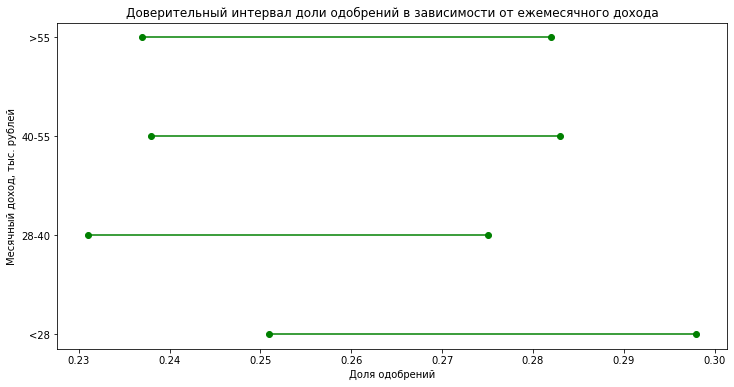

In [168]:
plt.figure(figsize(12,6))
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color='green')
plt.yticks(range(len(dataset)),list(dataset['category']))
plt.title('Доверительный интервал доли одобрений в зависимости от ежемесячного дохода')
plt.xlabel('Доля одобрений')
plt.ylabel('Месячный доход, тыс. рублей')

In [169]:
data_dict = {}
data_dict['category'] = ['<17','17-28','28-53', '>53']
data_dict['lower'] = [0.322, 0.265, 0.233, 0.139]
data_dict['upper'] = [0.371,0.311,0.278, 0.176]
dataset = pd.DataFrame(data_dict)

Text(0, 0.5, 'Запрашиваемая сумма, тыс. рублей')

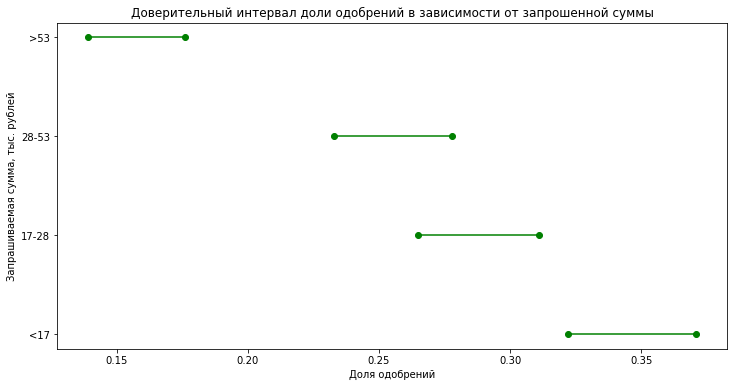

In [170]:
plt.figure(figsize(12,6))
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color='green')
plt.yticks(range(len(dataset)),list(dataset['category']))
plt.title('Доверительный интервал доли одобрений в зависимости от запрошенной суммы')
plt.xlabel('Доля одобрений')
plt.ylabel('Запрашиваемая сумма, тыс. рублей')

Теперь сделанные выводы обозначены наглядно